### Example 1: KNN Nearest Neighbours
Iris dataset

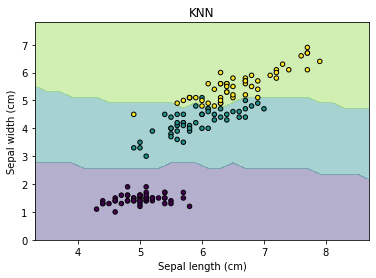

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Plotting decision regions
step = 0.2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                     np.arange(y_min, y_max, step))


# Training classifiers
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# Make predictions on grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)

# plot
plt.contourf(xx,yy,Z, alpha=0.4, levels=2)
plt.scatter(X[:,0], X[:,1],c=y, s=20, edgecolor='k')
plt.title('KNN')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.show()

### Example 1b: Change Units

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Change sepal_width from cm to m
X[:,1] = X[:,1]/100

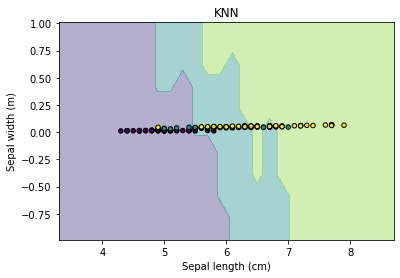

In [97]:
# Plotting decision regions
step = 0.2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                     np.arange(y_min, y_max, step))


# Training classifiers
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# Make predictions on grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)

# plot
plt.contourf(xx,yy,Z, alpha=0.4, levels=2)
plt.scatter(X[:,0], X[:,1],c=y, s=20, edgecolor='k')
plt.title('KNN')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (m)')
plt.show()


### Example 1c: Normalization

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Change sepal_width from cm to m
X[:,1] = X[:,1]/100

In [99]:
# Normalization of iris dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Normalize
scaler.fit(X)
X_norm = scaler.transform(X)

# Save data before normalization
X_orig = np.array(X)

# set x to normalized
X = X_norm

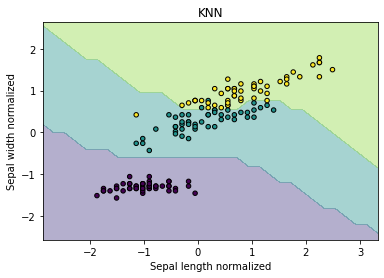

In [100]:
# Plotting decision regions
step = 0.2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                     np.arange(y_min, y_max, step))


# Training classifiers
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# Make predictions on grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)

# plot
plt.contourf(xx,yy,Z, alpha=0.4, levels=2)
plt.scatter(X[:,0], X[:,1],c=y, s=20, edgecolor='k')
plt.title('KNN')
plt.xlabel('Sepal length normalized')
plt.ylabel('Sepal width normalized')
plt.show()


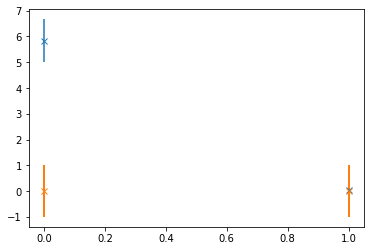

In [ ]:
# Display the mean and standard deviation
import matplotlib.pyplot as plt

plt.errorbar(np.arange(2), X_orig.mean(axis=0), X_orig.std(axis=0), linestyle='None', marker='x')
plt.errorbar(np.arange(2), X_norm.mean(axis=0), X_norm.std(axis=0), linestyle='None', linewidth=2, marker='x')
plt.show()

### Example 2a: Decision Trees
Iris dataset

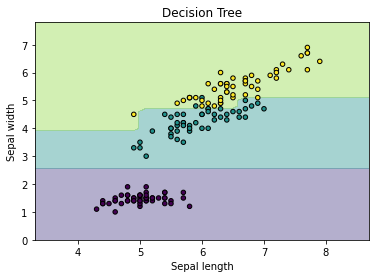

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#from sklearn import neighbors, datasets
from sklearn import tree, datasets

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Plotting decision regions
step = 0.2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                     np.arange(y_min, y_max, step))


# Training classifiers
#knn = neighbors.KNeighborsClassifier(n_neighbors=5)
model = tree.DecisionTreeClassifier(max_depth=4)

model.fit(X, y)

# Make predictions on grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)

# plot
plt.contourf(xx,yy,Z, alpha=0.4, levels=2)
plt.scatter(X[:,0], X[:,1],c=y, s=20, edgecolor='k')
plt.title('Decision Tree')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

In [ ]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None, feature_names=iris.feature_names[:2], class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("iris")

'iris.pdf'

### Example 2b: Decision Tree
Titanic Dataset

In [ ]:
# load train.csv to Google Colab
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import pandas as pd
df = pd.read_csv('train.csv')

In [ ]:
# replace gender with numbers
mapping = {'male': 0, 'female': 1} #dictionary
df = df.replace({'Sex': mapping})

# replace embarked with numbers
mapping = {'0': 0, 'C': 1, 'S': 2, 'Q': 3} #dictionary
df = df.replace({'Embarked': mapping})

# remove unnecessary attributes/features
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# add a family size feature
df['FamilySize'] = df['SibSp'] + df['Parch']

#fill nan
df = df.fillna(0)

In [ ]:
#first convert pandas to numpy
data_processed = df.values
print(df.shape)

# obtain columns
columns = df.columns.values
print('columns =', columns)

(891, 9)
columns = ['Survived' 'Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked'
 'FamilySize']


In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function

#splitting data
from sklearn.model_selection import train_test_split

train_data,val_data,train_labels,val_labels = train_test_split(data_processed[:,1:],
                                                               data_processed[:,0],
                                                               test_size=0.2)

#verify shape of data
print(train_data.shape, train_labels.shape)
print(val_data.shape, val_labels.shape)

(712, 8) (712,)
(179, 8) (179,)


In [ ]:
# fit model to a decision tree
model = DecisionTreeClassifier(max_depth=3)
model.fit(train_data, train_labels)

# obtain survival predictions on all testing data
val_predicted = model.predict(val_data)

# obtain a percentage score of performance on all testing data
score = 100*(1-sum(abs(val_predicted-val_labels))/len(val_predicted))
print('Validation data performance', score, '% correctly predicted')

Validation data performance 77.6536312849162 % correctly predicted


In [ ]:
# option 1 save decision tree as .pdf
import graphviz
dot_data = tree.export_graphviz(model, out_file=None, feature_names=columns[1:], class_names=['noSur', 'Sur'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("Titanic")

'Titanic.pdf'

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


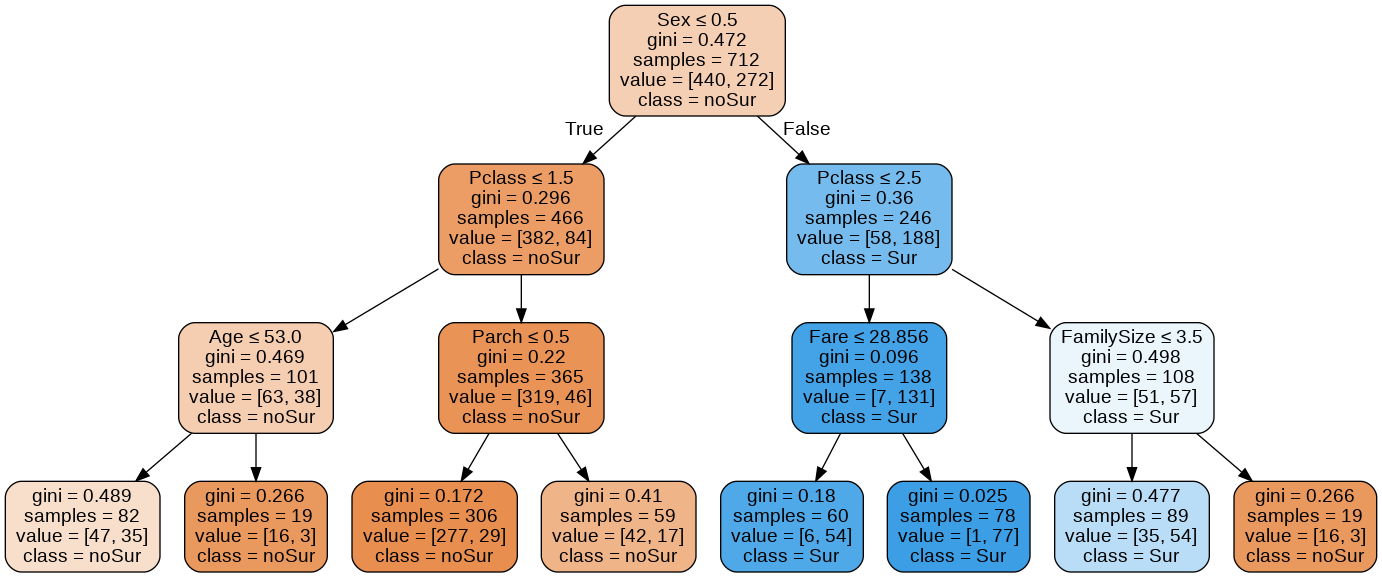

In [ ]:
# option 2 display decision tree inline
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
                feature_names=columns[1:], class_names=['noSur', 'Sur'],  
                filled=True, rounded=True, special_characters=True,)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Titanic_2.png')
Image(graph.create_png())

### Example 3: K-Means
Image Compression

In [ ]:
#source: https://towardsdatascience.com/image-compression-using-k-means-clustering-aa0c91bb0eeb

from skimage import io
from sklearn.cluster import KMeans
import numpy as np

In [ ]:
# load image.png to Google Colab
from google.colab import files
uploaded = files.upload()

Saving image.png to image (1).png


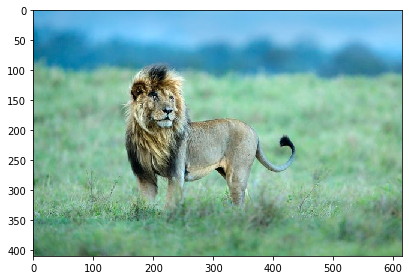

In [ ]:
#Read the image
image = io.imread('image.png')
io.imshow(image)
io.show()

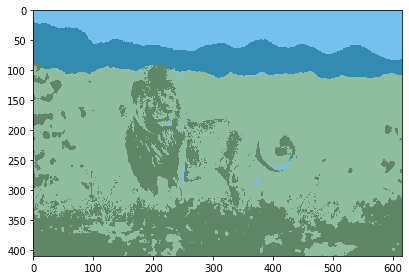

In [ ]:
#Dimension of the original image
rows = image.shape[0]
cols = image.shape[1]

#Flatten the image
image = image.reshape(rows*cols, 3)

#Implement k-means clustering to form k clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(image)

#Replace each pixel value with its nearby centroid
compressed_image = kmeans.cluster_centers_[kmeans.labels_]
compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image = compressed_image.reshape(rows, cols, 3)

#Save and display output image
io.imsave('compressed_image_4.png', compressed_image)
io.imshow(compressed_image)
io.show()